In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

分别输出三组对比图，每组对比图左边为原图灰度图，右边依次为1.双谱重构图；2.相位谱θ(u,v)=0，利用幅度谱重构图；3.幅度谱|F(u,v)|=1，利用相位谱重构图。

幅度谱、相位谱双谱重构图：


c:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
c:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


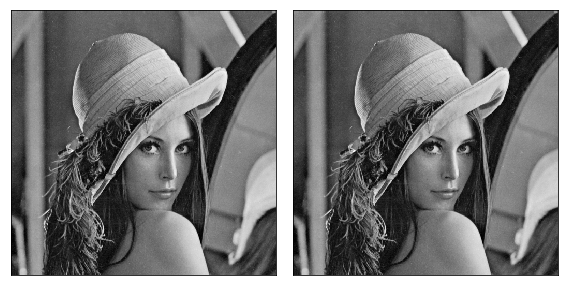

相位谱为0，幅度谱重构图：


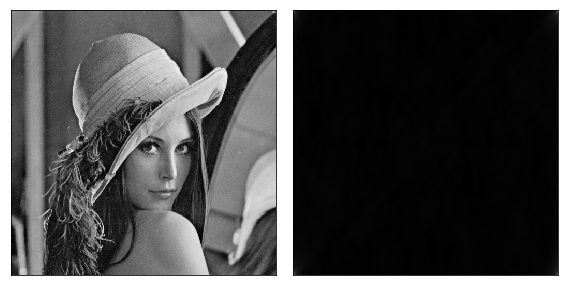

幅度谱为1，相位谱重构图：


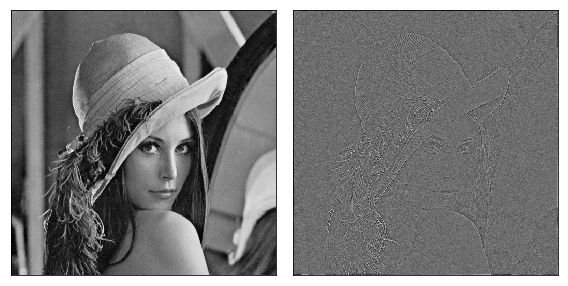

In [2]:
img = cv2.imread('lena.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img_fft = np.fft.fft2(gray)
img_fftshift = np.fft.fftshift(img_fft)
img_magnitude = np.log(np.abs(img_fftshift))
img_phase = np.log(np.angle(img_fftshift)*180/math.pi)
img_rebulid = np.fft.ifft2(np.abs(img_fft)*np.exp(1j*(np.angle(img_fft))))
img_rebulid = np.real(img_rebulid)

magnitude = np.real(np.fft.ifft2(np.abs(img_fft)))
phase = np.real(np.fft.ifft2(np.exp(1j*np.angle(img_fft))))


print('幅度谱、相位谱双谱重构图：')
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(gray,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_rebulid, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

print('相位谱为0，幅度谱重构图：')
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(gray,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude,'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

print('幅度谱为1，相位谱重构图：')
plt.figure(figsize=(8, 4))
plt.subplot(121), plt.imshow(gray,'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(phase, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()
